# Example from Statsmodels
https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Duncan’s Prestige Dataset

## Load the Data

We can use a utility function to load any R dataset available from the great Rdatasets package.

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data
#dont' worry about the warning

/Users/Sarah/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [3]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [10]:
prestige.head(10)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


In [51]:
prestige.dtypes

type         object
income        int64
education     int64
prestige      int64
dtype: object

In [46]:
prestige.isna().sum()

type         0
income       0
education    0
prestige     0
dtype: int64

In [5]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           8.65e-17
Time:                        14:01:37   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

In [6]:
prestige_model.params

Intercept   -6.064663
income       0.598733
education    0.545834
dtype: float64

In [7]:
prestige_model.params[2] #edu coefficient 

0.54583390940088

In [14]:
prestige_model.rsquared_adj #Adjusted R^2

0.8199911990283996

## Partial Regression Plots

EX// Education on Prestige holding Income constant

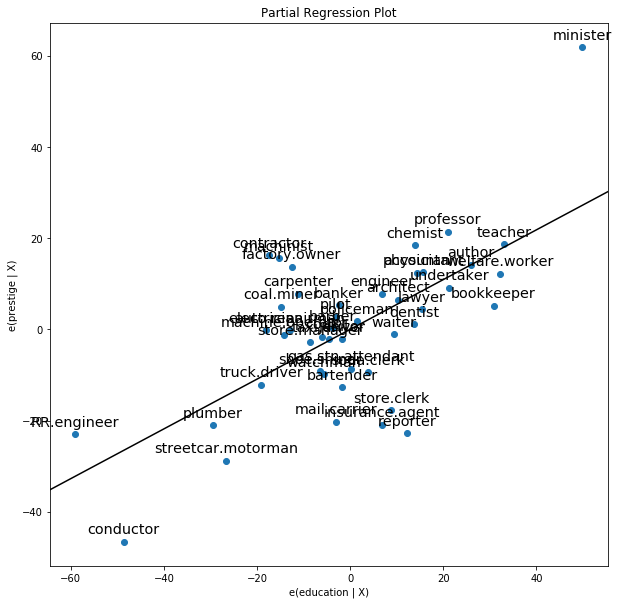

In [12]:
fix, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.plot_partregress("prestige", "education", ["income"], data=prestige, ax=ax)

# Dummy Varaible Example from Toward Data Science
https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40 

In [26]:
import pandas as pd

In [38]:
df = pd.read_table('http://data.princeton.edu/wws509/datasets/salary.dat',delim_whitespace = True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [39]:
regn = ols("sl ~ yr", data=df).fit()
print(regn.summary())

                            OLS Regression Results                            
Dep. Variable:                     sl   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     48.22
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           7.34e-09
Time:                        14:30:53   Log-Likelihood:                -507.38
No. Observations:                  52   AIC:                             1019.
Df Residuals:                      50   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.817e+04   1003.658     18.100      0.0

sx= sex, rk = rank, yr = year in current rank, dg= degree, yd = years since earning highest degree, sl = salary

In [28]:
dummy = pd.get_dummies(df['dg'])

In [29]:
dummy.head()

,doctorate,masters
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [30]:
dummy = pd.get_dummies(df['dg'], drop_first=True)
dummy.head()

,masters
0,0
1,0
2,0
3,0
4,1


In [32]:
dummy = pd.get_dummies(data=df, columns=['sx', 'rk', 'dg'], drop_first=True)
dummy.head()

,yr,yd,sl,sx_male,rk_associate,rk_full,dg_masters
0,25,35,36350,1,0,1,0
1,13,22,35350,1,0,1,0
2,10,23,28200,1,0,1,0
3,7,27,26775,0,0,1,0
4,19,30,33696,1,0,1,1


In [40]:
df = df.merge(dummy, left_index = True, right_index = True)
df.head()
#This needs some cleaning, but ok for now

,sx,rk,yr_x,dg,yd_x,sl_x,yr_y,yd_y,sl_y,sx_male,rk_associate,rk_full,dg_masters
0,male,full,25,doctorate,35,36350,25,35,36350,1,0,1,0
1,male,full,13,doctorate,22,35350,13,22,35350,1,0,1,0
2,male,full,10,doctorate,23,28200,10,23,28200,1,0,1,0
3,female,full,7,doctorate,27,26775,7,27,26775,0,0,1,0
4,male,full,19,masters,30,33696,19,30,33696,1,0,1,1


In [44]:
regn = ols("sl_x ~ sx_male + rk_associate + rk_full + dg_masters", data=df).fit()
print(regn.summary())
#recall from Stats that we can probably do beter at estimating this, but this is fine for now

                            OLS Regression Results                            
Dep. Variable:                   sl_x   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     38.09
Date:                Tue, 02 Jun 2020   Prob (F-statistic):           3.40e-14
Time:                        14:34:00   Log-Likelihood:                -487.37
No. Observations:                  52   AIC:                             984.7
Df Residuals:                      47   BIC:                             994.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.706e+04    914.059     18.663   